In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = "/home/manu/tech/dev/ml/data/bulldozers/"

In [4]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

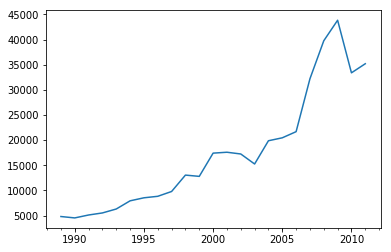

In [19]:
df_raw.saledate.value_counts().resample('Y').sum().plot.line()

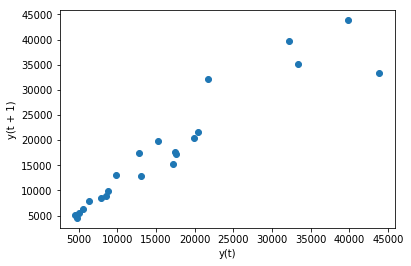

In [27]:
from pandas.plotting import lag_plot
lag_plot(df_raw.saledate.value_counts().resample('Y').sum())

In [5]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [7]:
add_datepart(df_raw, 'saledate')

In [8]:
train_cats(df_raw)

In [9]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [10]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [11]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9831271312032676

In [12]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [13]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [14]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 8s, sys: 332 ms, total: 1min 8s
Wall time: 23.1 s
[0.09027703924822998, 0.24717390880860887, 0.9829670668912625, 0.8908928466209963]
